<a href="https://colab.research.google.com/github/OVP2023/PYstaticsForAnalize_v2/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для отдела аналитики маркетплейса необходимо поработать с данными e-commerce. Вам предстоит изучить активность магазина в различных регионах, чтобы выстроить стратегию развития.

    Используйте датасет data_hw_2_(upd).xlsx.
    Постройте гистограммы плотности распределения объёмов продаж для Франции и Германии и определите типы распределений.
    С помощью стат. критериев сравните объёмы продаж во Франции и Германии:
    Гипотеза: «Объёмы продаж Франции отличаются от объёмов продаж Германии».
    Сделайте выводы по результатам проверки.

Примечание: базовые гипотезы всегда формулируются одинаково, нулевая гипотеза гласит, что выборки значимо не отличаются, альтернативная – наоборот; проверяемая гипотеза всегда является альтернативной.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('data_hw_2__upd_.xlsx')
df.head()

,InvoiceNo,CustomerID,Country,InvoiceDate,Description,TotalPrice
0,537693,12441,France,2010-12-08,WRAP I LOVE LONDON,51.11
1,537693,12441,France,2010-12-08,VINTAGE CARAVAN GIFT WRAP,43.61
2,537693,12441,France,2010-12-08,BLUE SCANDINAVIAN PAISLEY WRAP,73.08
3,537693,12441,France,2010-12-08,PAPER CHAIN KIT VINTAGE CHRISTMAS,39.17
4,537693,12441,France,2010-12-08,PAPER CHAIN KIT 50'S CHRISTMAS,57.48


In [ ]:
df_1=df[df['Country']=='France']
df_2=df[df['Country']=='Germany']

In [ ]:
print('длина выборки df_2 = ',len(df_2))
df_2.head()


длина выборки df_2 =  400


,InvoiceNo,CustomerID,Country,InvoiceDate,Description,TotalPrice
400,537892,12481,Germany,2010-12-09,POSTAGE,66.87
401,537892,12481,Germany,2010-12-09,BABUSHKA LIGHTS STRING OF 10,62.05
402,537892,12481,Germany,2010-12-09,CHILDS BREAKFAST SET CIRCUS PARADE,37.33
403,537892,12481,Germany,2010-12-09,SET 12 KIDS COLOUR CHALK STICKS,43.03
404,537892,12481,Germany,2010-12-09,VINTAGE HEADS AND TAILS CARD GAME,53.42


In [ ]:
print('длина выборки df_1 = ',len(df_1))
df_1.head()

длина выборки df_1 =  400


,InvoiceNo,CustomerID,Country,InvoiceDate,Description,TotalPrice
0,537693,12441,France,2010-12-08,WRAP I LOVE LONDON,51.11
1,537693,12441,France,2010-12-08,VINTAGE CARAVAN GIFT WRAP,43.61
2,537693,12441,France,2010-12-08,BLUE SCANDINAVIAN PAISLEY WRAP,73.08
3,537693,12441,France,2010-12-08,PAPER CHAIN KIT VINTAGE CHRISTMAS,39.17
4,537693,12441,France,2010-12-08,PAPER CHAIN KIT 50'S CHRISTMAS,57.48


<ipython-input-22-122613bda7f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['TotalPrice'],50)
<ipython-input-22-122613bda7f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['TotalPrice'],50)


<function matplotlib.pyplot.show(close=None, block=None)>

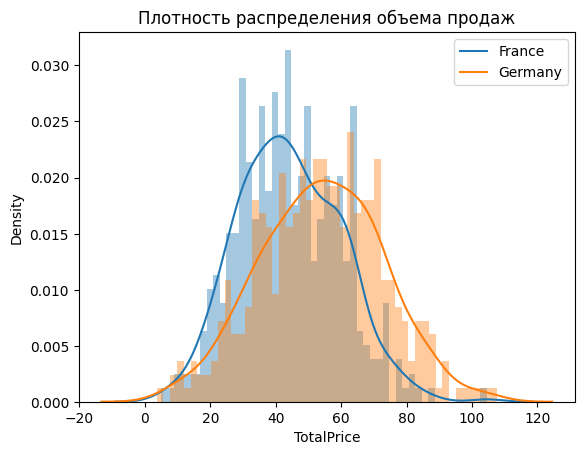

In [ ]:
sns.distplot(df_1['TotalPrice'],50)
sns.distplot(df_2['TotalPrice'],50)
plt.title('Плотность распределения объема продаж')
plt.legend(['France','Germany'])
plt.show


In [ ]:
from scipy.stats import ttest_ind
alpha=0.05

In [ ]:
result=ttest_ind(df_1['TotalPrice'],df_2['TotalPrice'])
print('p-value:%.8f'%result.pvalue)
if (result.pvalue<alpha):
    print('Отвергаем нулевую гипотезу (H0 "Объем продаж France статистически значимо не отличается от объема продаж в Germany")')
else:
    print('Не отвергаем нулевую гипотезу')

p-value:0.00000000
Отвергаем нулевую гипотезу (H0 "Объем продаж France статистически значимо не отличается от объема продаж в Germany")


Как следует из гистограммы Плотности распределения продаж данные имеют нормальное распределение.
Согласно вычисленному критерию Стьюдента объем продаж во Франции статистически значимо отличается от объема продаж в Германии, т.е. мы отвергаем нулевую гипотезу.